In [ ]:
# Install packages
!apt install git curl -y
%pip install ftfy regex requests tqdm jupyterlab ipywidgets

# Clone repository
!git clone --recursive https://github.com/crowsonkb/v-diffusion-pytorch

# Download diffusion model
!mkdir v-diffusion-pytorch/checkpoints
!curl -L https://v-diffusion.s3.us-west-2.amazonaws.com/cc12m_1_cfg.pth > v-diffusion-pytorch/checkpoints/cc12m_1_cfg.pth

In [ ]:
%load_ext autoreload
%autoreload 2

from diffusion_model import DiffusionModel

In [31]:
DEFAULTS = {
    'weight': 5,
    'n_images': 1,
    'max_timestep': 1,
    'eta': 1,
    'seed': 0,
    'save': False,
    'use_init': False,
    'reverse': False,
    'size': (256, 256),
    'display': True,
    'display_every': None,
    'steps': 100,
    'scale': None,
    'save_name': None,
    'load_name': None,
    'renoise': None,
}

def run(params, init=None):
    params = {**DEFAULTS, **params}
    print(params)
    return DiffusionModel(params, init).run()

def upscale_complex(params):
    x = run({
        'reverse': True,
        'scale': 2,
        'load_name': 'output',
        'max_timestep': 0.8,
        **params,
        'prompt': None,
        'save_name': None,
    })
    run({
        **params,
        'max_timestep': 0.8,
        'load_name': None,
    }, x)

def upscale_simple(params):
    run({
        'max_timestep': 0.7,
        'renoise': 1.03,
        'scale': 2,
        **params,
    })

def discover(params):
    seed = params.get('seed') or DEFAULTS['seed']
    while True:
        run({
            **params,
            'seed': seed,
            'save_name': f'{params["save_name"]}_{seed}',
        })
        seed += 1

{'weight': 5, 'n_images': 1, 'max_timestep': 0.7, 'eta': 1, 'seed': 0, 'save': False, 'use_init': False, 'reverse': False, 'size': (256, 256), 'display': True, 'display_every': None, 'steps': 50, 'scale': 4, 'save_name': None, 'load_name': 'microprocessor_38', 'renoise': 1.03, 'prompt': 'microprocessor digital art'}


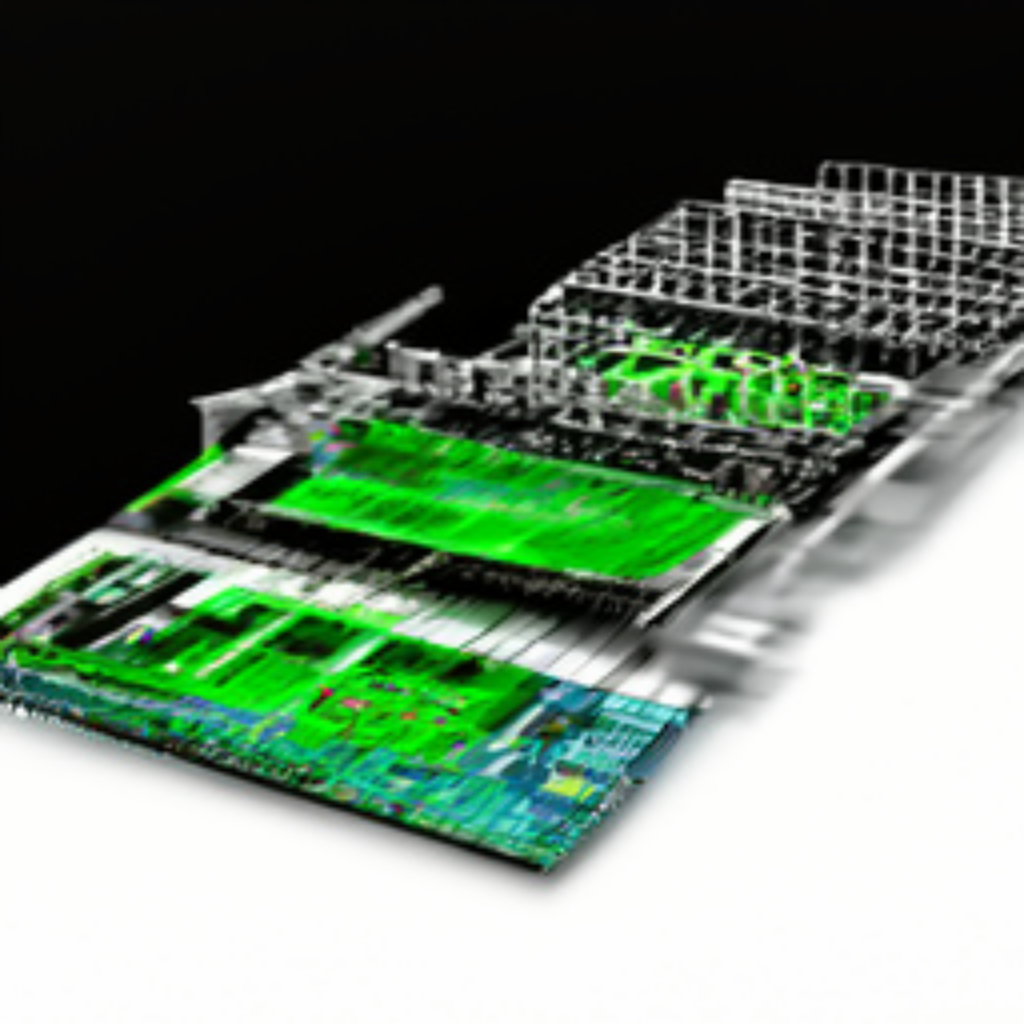

  0%|          | 0/27 [00:00<?, ?it/s]

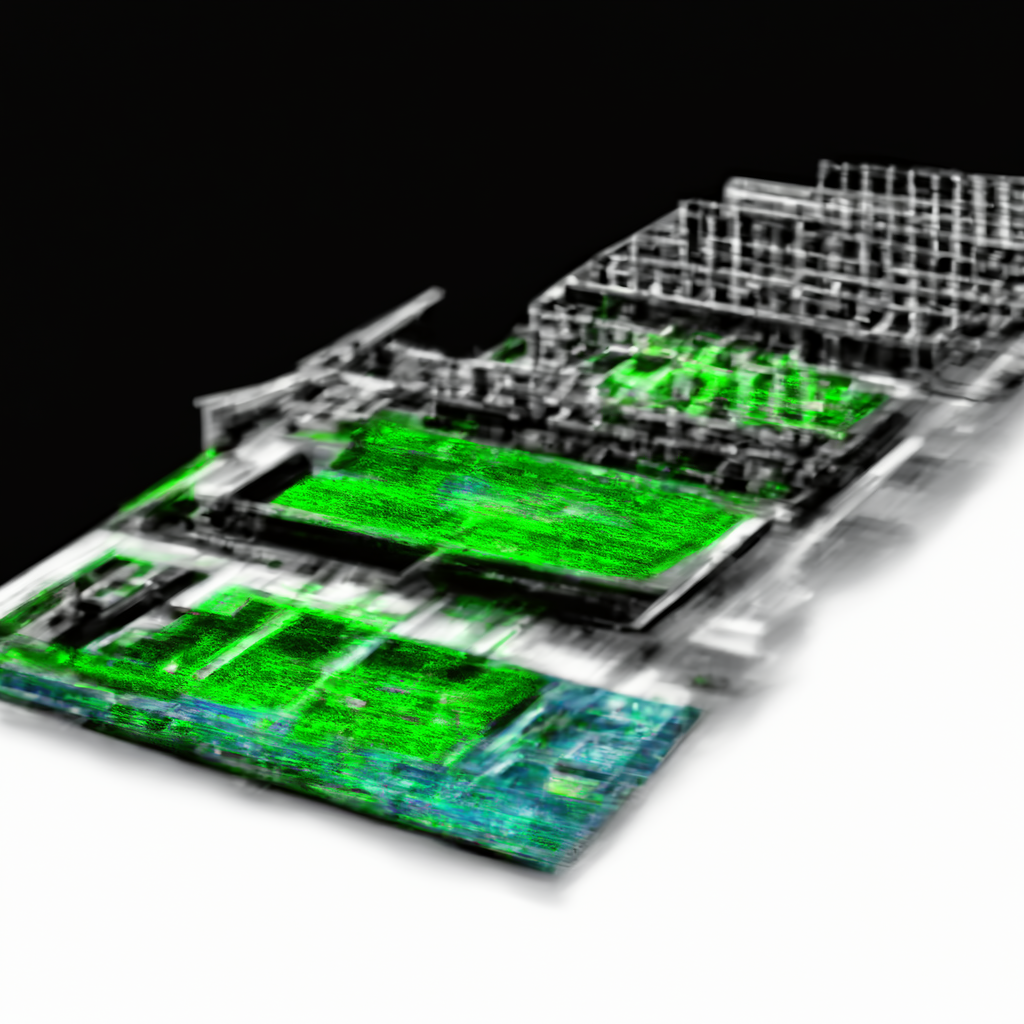

Done!


In [47]:
prompt = 'microprocessor digital art'

# discover({
#     'prompt': prompt,
#     'steps': 200,
#     'save_name': 'microprocessor',
# })

upscale_simple({
    'prompt': prompt,
    'load_name': 'microprocessor_38',
    'steps': 50,
    'scale': 4,
})

# upscale_complex({
#     'prompt': prompt,
#     'load_name': 'microprocessor_38',
#     'steps': 20,
#     'max_timestep': 0.01,
# })



print('Done!')